# Lecture 15 - Advanced Plotting I: Object-Oriented Plotting
Aidan Hunt, University of Washington

***

## Learning Objectives
After this lesson, students will be able to:
- Utilize both the implicit and explicit plotting interfaces to create plots in Matplotlib
- Identify the key "artist" objects that are part of figures
- Customize plot labels, ticks, markers, and legends


## Check-in
- Start HW6!
- HW5 grades will come back this week

***

## Framing

Data visualization is a very important skill for engineers
- How we communicate results to others
- Also very helpful for exploring data, troubleshooting issues, etc. when we are working on our own.
- Important to get comfortable with generating plots on the fly

For the next three lectures, we'll be taking a deep-dive into Matplotlib, the most popular plotting package in Python
- Provides MATLAB-like plotting
- Builds on the NumPy package, compatible with Pandas
- Skills we learn here are fairly transferrable to MATLAB, too!

Why did we wait so long?
- Everything in Matplotlib is an object
- Now that we know more about object-oriented programming, we can get into the weeds a bit more


When importing Matplotlib, we typically import `matplotlib.pyplot as plt`
- `matplotlib` is the overall toolset
- `pyplot` is the plotting interface (what we use to create figures in a MATLAB-like way)
- `plt` is the conventional "alias" for `matplotlib.pyplot`, allows us to use shorthand

In [110]:
# Importing plotting tools
import matplotlib.pyplot as plt

# We'll also import numpy to generate some data
import numpy as np

***
## Revisiting plot creation syntax

Let's revisit what we know so far - the basic syntax for generating a plot using Matplotlib

In [128]:
# Generate some data (simple sine curve)
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)

### The "implicit" approach

Commonly, we interface with `plt` and only `plt` for creating and customizing figures.

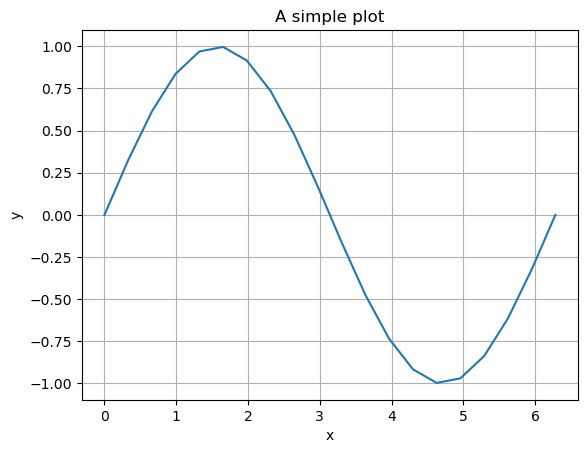

In [129]:
# Create an empty figure
plt.figure()

# Plot the data
plt.plot(x, y)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('A simple plot')

# Add grid
plt.grid()

### The "explicit" approach

An alternative approach is to use `plt.subplots()` to create `Figure` and `Axes` **objects**, and then interface with those to create cutomsize our plot.

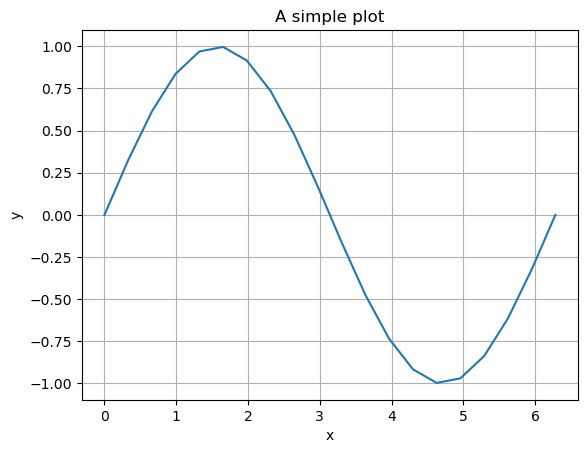

In [130]:
# Create a figure with a single axes on it
fig, ax = plt.subplots()

# Plot the data on axes
ax.plot(x, y)

# Add labels and title to that axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple plot')

# Add grid to the axes
ax.grid()

### What's the difference?

In the **explicit approach**, we are using `pyplot` to create objects that represent our plot, and then interfacing with those objects directly.
- `fig` is an object that represents the figure
- `ax` is an object that represents the axes on the figure
- We talk to the axes object to plot things on it, add labels, etc.

In the **implicit approach**, we are interfacing with `pyplot` to do everything.
- `Figure`, `Axes` objects are present, but not directly interacted with
- `pyplot` interfaces with the "current figure" and "current axes"
- *Note*: We can mix the two approaches: for example, creating a `Figure` object with `fig = plt.Figure()`, but the convenience of using the implicit approach is that it handles interfacing with these objects for you.

### Which to use?

I recommend that you practice using the **explicit approach** (creating your `Figure` and `Axes` objects and using them directly)
- The **implicit approach** has simple syntax, but is really only good for simple plots
- The **explicit approach** is a little bit wordier, but ultimately gives you more control, and allows you to create more intricate figures.

For example, with `plt.subplots()`, we can generate a tiled layout of multiple axes on the same figure!
- Use the optional `nrows` and `ncols` arguments
- `ax` becomes a NumPy array of `Axes` objects!

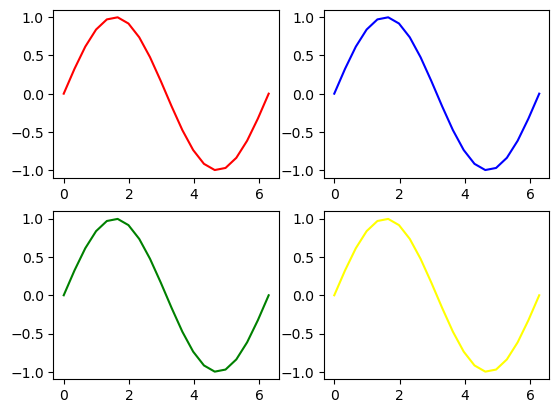

In [131]:
# Let's create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2)

# Talk to each axes to plot on it
ax[0,0].plot(x, y, '-', color='red')
ax[0,1].plot(x, y, '-', color='blue')
ax[1,0].plot(x, y, '-', color='green')
ax[1,1].plot(x, y, '-', color='yellow')

In [132]:
# ax is now an array of axes objects
print(ax)
print(type(ax))

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
<class 'numpy.ndarray'>


***
## Artists - The objects of Matplotlib

These plot-related objects in Matplotlib are called "Artists"
- *Containers*: The canvases on which we paint:
    - `Figures`
    - `Axes`
- *Primitives*: The things we paint on the canvas
    - Lines, text, etc
    
These objects have properties (AKA special attributes) that allow us to customize them.

Let's take a look at some of the properties of the figure object that we created earlier.

In [133]:
# Use the .getp pyplot function to get the properties of the figure stored in fig
plt.getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <...
    children = [<matplotlib.patches.Rectangle object at 0x0000018...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    default_bbox_extra_artists = [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <...
    dpi = 100.0
    edgecolor = (1.0, 1.0, 1.0, 1.0)
    facecolor = (1.0, 1.0, 1.0, 1.0)
    figheight = 4.8
    figure = Figure(640x480)
    figwidth = 6.4
    frameon = True
    gid = None
    in_layout = True
    label = 
    linewidth = 0.0
    path_effects = []
    picker = None
    rasterized = False
    size_inches = [6.4 4.8]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     B

Let's alter some of these properties to customize our figure:
- Interface with "setter" and "getter" methods
- This approach is Matplotlib's way of ensuring that these objects are used how we expect them to be used (re: privacy from object-oriented programming lesson)

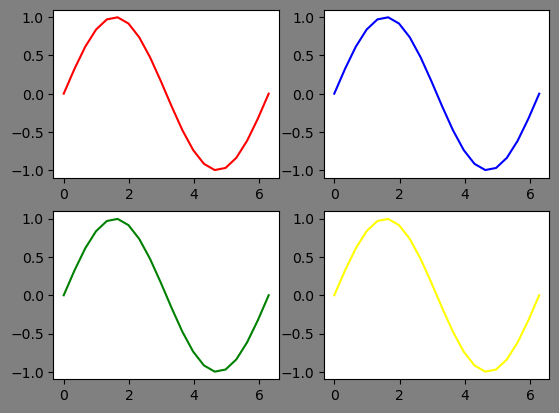

In [134]:
# Set the figure background to gray
fig.set_facecolor('gray')
fig

In [135]:
# Get the value of the facecolor property
fig.get_facecolor()

(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)

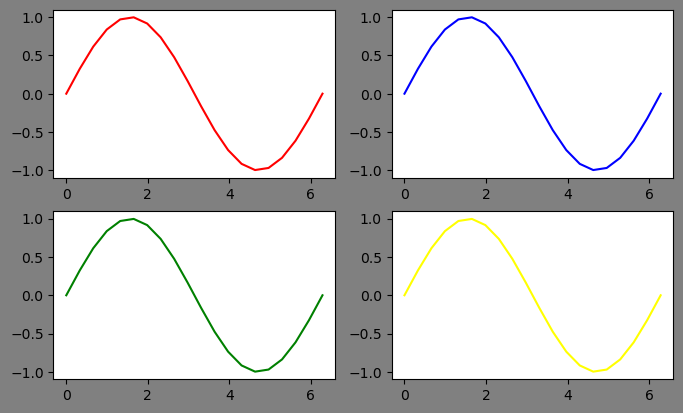

In [136]:
# Change the figure width to 8"
fig.set_figwidth(8)
fig

### What about the axes object?

Let's look at the axes in the upper left-hand corner:
- We can interface with properties using setters and getters like before.
- We can also use the generalized `.set` method to set multiple properties (this works for all `Artists`).

In [137]:
# Take a look at the properties of the axes
plt.getp(ax[0,0])

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.lines.Line2D object at 0x000001879EE0...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 0.31722269654148383
    default_bbox_extra_artists = [<matplotlib.lines.Line2D object at 0x000001879EE0...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(800x480)
    frame_on = True
    geometry = (2, 2, 1)
    gid = None
    gridspec = GridSpec(2, 2)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 1 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.53, x1=0.47727272727272724, y1...
 

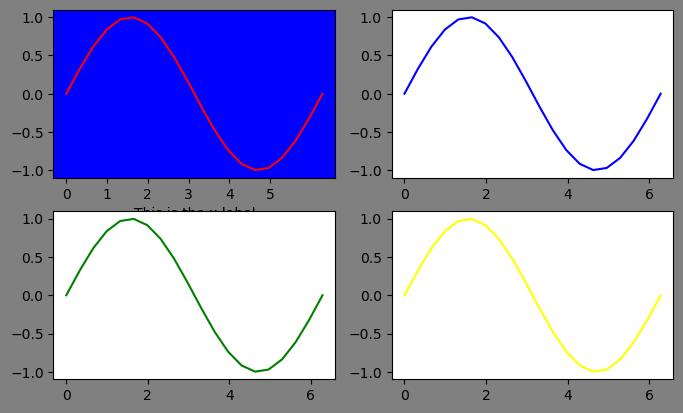

In [138]:
ax[0,0].set(xlabel='This is the x label', facecolor='blue', xticks=[0, 1, 2, 3, 4, 5])
fig

### What about the lines on the plots?

These are objects too, and are returned by the `Axes.plot()` or `pyplot.plot()` methods. Let's alter our code to plot two lines on the same axes.

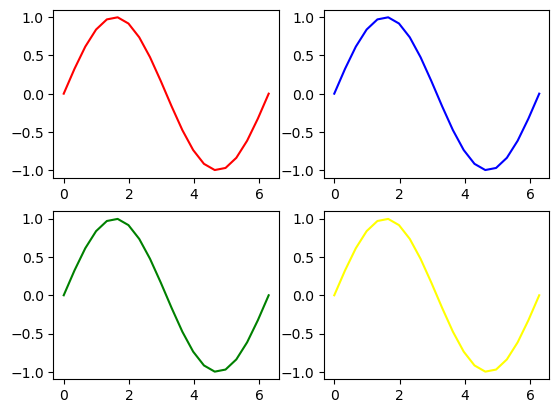

In [139]:
# Let's create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2)

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x, y, '-', color='red')
lines[0,1] = ax[0,1].plot(x, y, '-', color='blue')
lines[1,0] = ax[1,0].plot(x, y, '-', color='green')
lines[1,1] = ax[1,1].plot(x, y, '-', color='yellow')

In [140]:
# Look at what our array of lines looks like
lines

array([[list([<matplotlib.lines.Line2D object at 0x000001879F0F8040>]),
        list([<matplotlib.lines.Line2D object at 0x000001879F0F8310>])],
       [list([<matplotlib.lines.Line2D object at 0x000001879F0F85E0>]),
        list([<matplotlib.lines.Line2D object at 0x000001879F0F88B0>])]],
      dtype=object)

In [141]:
# Get properties of line in upper lefthand corner
plt.getp(lines[0,0][0])

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = red
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0.        , 0.33069396, 0.66138793, 0.9920...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = red
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = red
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[ 0.00000000e+00,  0.00000000e+00],   ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    solid_joinstyle = round
    tra

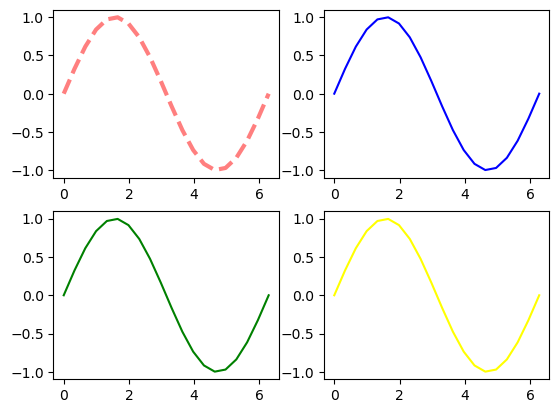

In [142]:
# Set the "alpha" property to make slightly transparent
# Set the linestyle to dashed
# Set the line width to 3
lines[0,0][0].set(alpha=0.5, linestyle='--', linewidth=3)
fig

***
## Customizing when creating

While it's important to know how to access and alter the properties of `Artist` objects after we create them, we can customize them right when we create them (this is what we usually do).

For example, we can customize a line object right when we create it (which is how we've been setting the colors)


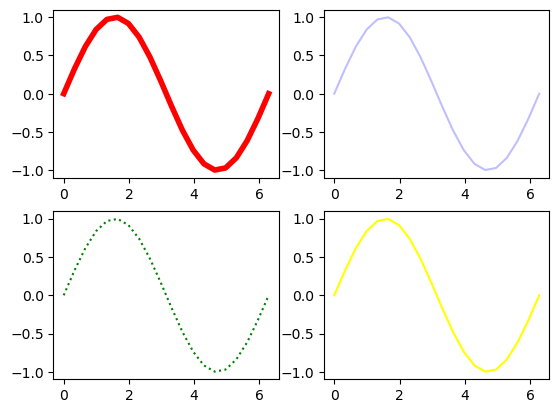

In [143]:
# Let's create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2)

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x, y, color='red', linewidth=4)
lines[0,1] = ax[0,1].plot(x, y, color='blue', alpha=0.25)
lines[1,0] = ax[1,0].plot(x, y, color='green', linestyle=':')
lines[1,1] = ax[1,1].plot(x, y, color='yellow')

### Shorthand

Because plotting lines is such a common task, we can combine linestyle, markers, and color into a single line specification string.

Line styles: Type of line to be plotted
- `-`: solid line
- `--`: dashed line
- `:`: dotted line

Markers: marker for each data point
- `o`: circles
- `v`: triangles (point down)
- `s`: squares
- `d`: diamonds

Color: Color of line and markers
- Commond colors have string names associated
- `red` or `r`: red
- `black` or `k`: black
- `blue` or `b`: blue

For example:

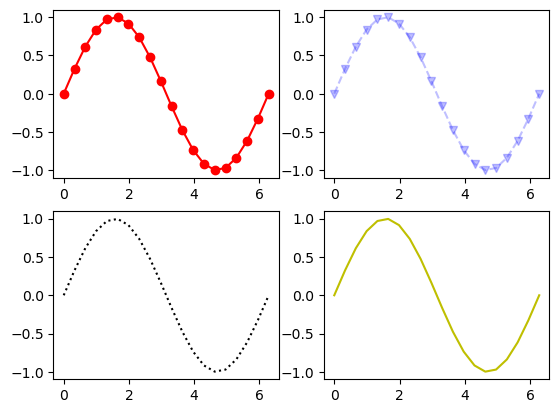

In [148]:
# Let's create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2)

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x, y, '-ro') # Red line with circular markers
lines[0,1] = ax[0,1].plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[1,0] = ax[1,0].plot(x, y, ':k') # Black dotted line (no markers)
lines[1,1] = ax[1,1].plot(x, y, 'y') # Yellow line (solid line plotted by default)

### Summary

Any time we are customizing our figures, we are altering the properties of the associated objects.
- Various "layers" of Artist objects (`Axes` in `Figures`, `Axis` in `Axes`, `Tick` in `Axis`, and lines/graphics plotted on `Axes`)
- Various ways of talking to these objects
    - Set properties when creating the object
    - Set properties afterward with setter and getter methods
- These objects are just like any other data - we can store them in variables and arrays for referencing later.
- Highly recommend using the object-oriented method to get comfortable talking to the objects directly!


***
## More about `plt.subplots()`

`plt.subplots()` is a super powerful function for generating quick layouts of plots, and I highly recommend that you get familiar with it! It has many quality of life features, too.

### Constrained layout
Let's add axes labels to our grid of plots above:

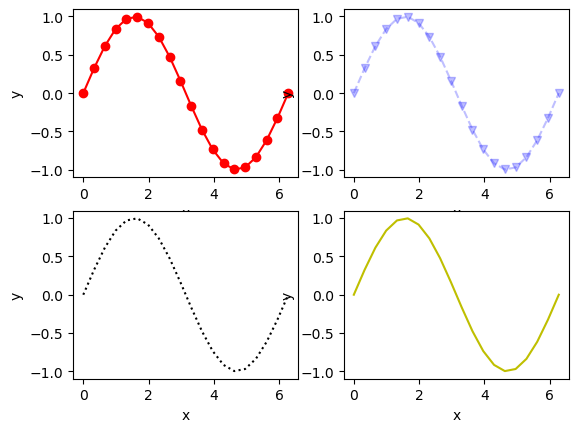

In [160]:
# Let's create a figure with 2 rows and 2 columns
nRows = 2
nCols = 2
fig, ax = plt.subplots(nrows=nRows, ncols=nCols)

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x, y, '-ro') # Red line with circular markers
lines[0,1] = ax[0,1].plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[1,0] = ax[1,0].plot(x, y, ':k') # Black dotted line (no markers)
lines[1,1] = ax[1,1].plot(x, y, 'y') # Yellow line (solid line plotted by default)

for i in range(nRows):
    for j in range(nCols):
        ax[i,j].set(xlabel='x', ylabel='y')

Notice that our "x" labels on the top plots are covered up, and the "y" labels on the right-side plots reach into the left-side plots.

To avoid this, use the `layout=constrained` option when creating the subplots!
- This option ensures that all plot elements don't overlap

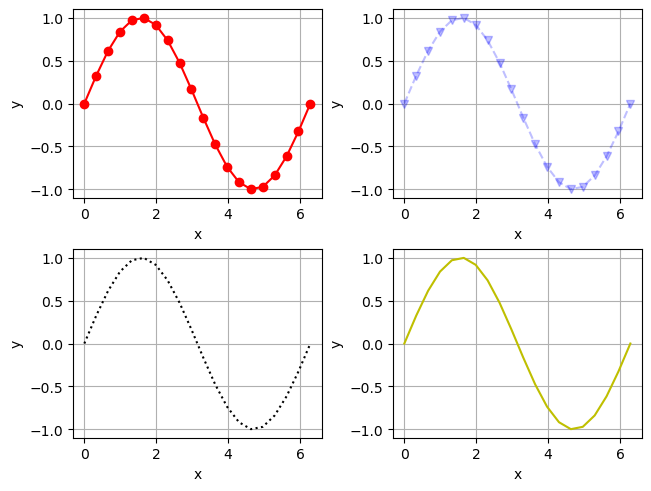

In [163]:
# Let's create a figure with 2 rows and 2 columns
nRows = 2
nCols = 2
fig, ax = plt.subplots(nrows=nRows, ncols=nCols, layout='constrained')

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x, y, '-ro') # Red line with circular markers
lines[0,1] = ax[0,1].plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[1,0] = ax[1,0].plot(x, y, ':k') # Black dotted line (no markers)
lines[1,1] = ax[1,1].plot(x, y, 'y') # Yellow line (solid line plotted by default)

for i in range(nRows):
    for j in range(nCols):
        ax[i,j].set(xlabel='x', ylabel='y')
        ax[i,j].grid(visible=True)

### `sharex` and `sharey`

What if we plotted only part of the data on each axes?

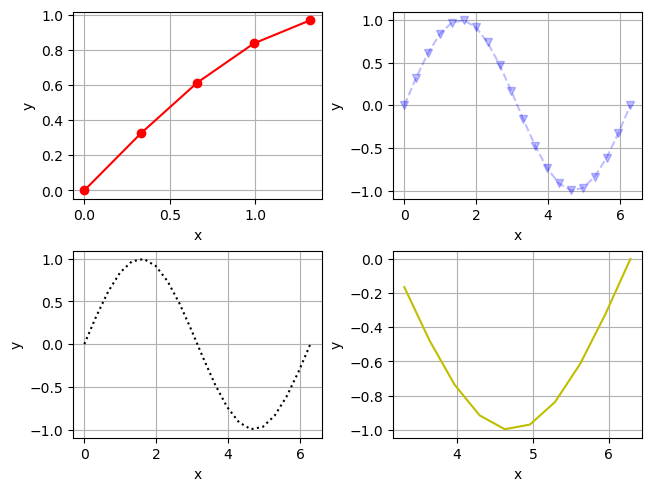

In [166]:
# Let's create a figure with 2 rows and 2 columns
nRows = 2
nCols = 2
fig, ax = plt.subplots(nrows=nRows, ncols=nCols, layout='constrained')

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x[0:5], y[0:5], '-ro') # Red line with circular markers
lines[0,1] = ax[0,1].plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[1,0] = ax[1,0].plot(x, y, ':k') # Black dotted line (no markers)
lines[1,1] = ax[1,1].plot(x[10:], y[10:], 'y') # Yellow line (solid line plotted by default)

for i in range(nRows):
    for j in range(nCols):
        ax[i,j].set(xlabel='x', ylabel='y')
        ax[i,j].grid(visible=True)

Our axes are no longer share the same x and y limits, but maybe we could like them to.
- We could manually go through each axes and adjust the limits...
- Or we could specify `sharex` and `sharey` as `True` when we create the subplots to do this automatically!
- Notice that this automatically removes redundant ticks from the plot

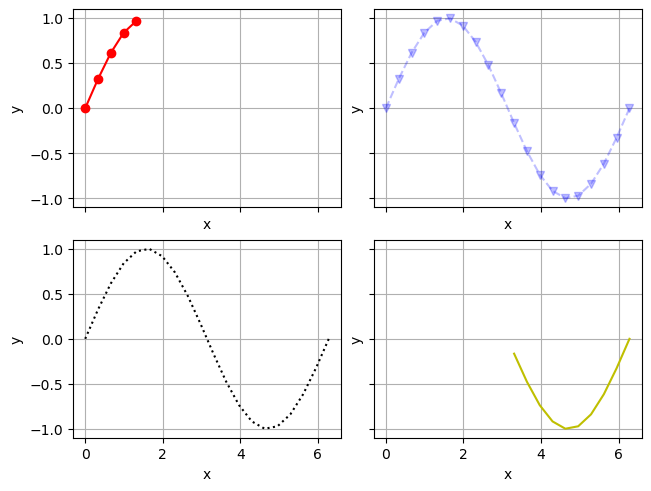

In [167]:
# Let's create a figure with 2 rows and 2 columns
nRows = 2
nCols = 2
fig, ax = plt.subplots(nrows=nRows, ncols=nCols, layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros([2,2], dtype=object)

# Talk to each axes to plot on it
lines[0,0] = ax[0,0].plot(x[0:5], y[0:5], '-ro') # Red line with circular markers
lines[0,1] = ax[0,1].plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[1,0] = ax[1,0].plot(x, y, ':k') # Black dotted line (no markers)
lines[1,1] = ax[1,1].plot(x[10:], y[10:], 'y') # Yellow line (solid line plotted by default)

for i in range(nRows):
    for j in range(nCols):
        ax[i,j].set(xlabel='x', ylabel='y')
        ax[i,j].grid(visible=True)

***
## Customizing legends

Now let's say that we want to add legend(s) to our figure. Let's consider a figure that has all of these lines on the same axes.


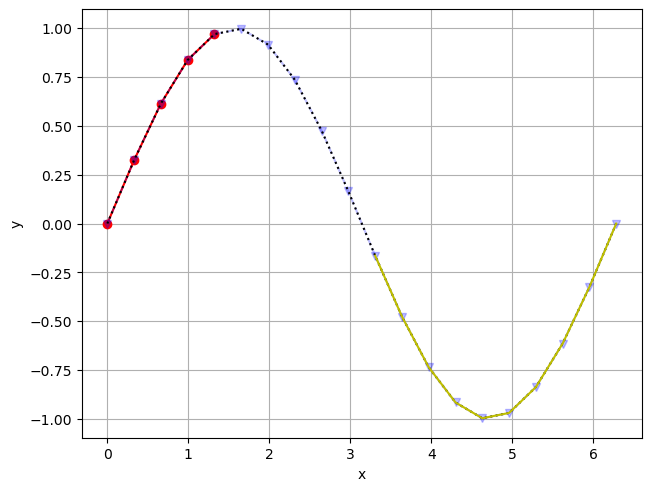

In [183]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25) # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)

### Calling `Axes.legend()` with no arguments
Calling `.legend()` on an `Axes` object will create a legend and populate it with the contents of the `Axes`.
- Legend is placed in the best
- We can specify labels at the time of plotting, or after the fact.

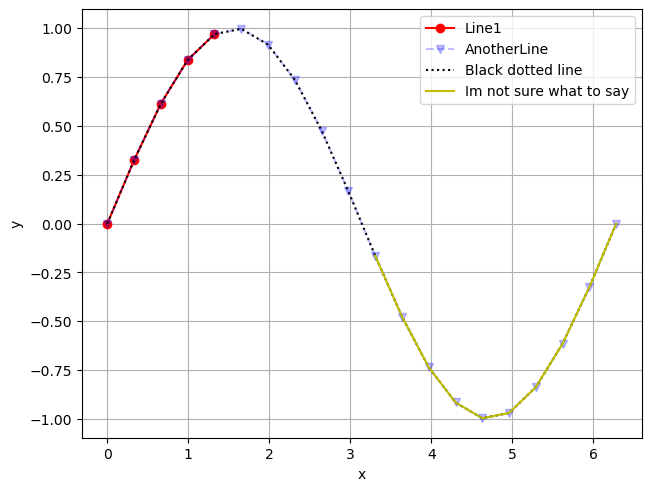

In [184]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro', label='Line1') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25, label='AnotherLine') # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k', label='Black dotted line') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y', label='I''m not sure what to say') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)
ax.legend()

### Specifying which objects to include in the legend
We can also manually specify which lines to put in the legend
- Use the `handles` argument
- Can even specify lines that are not on the axes
- For example, let's only include the last line in the legend

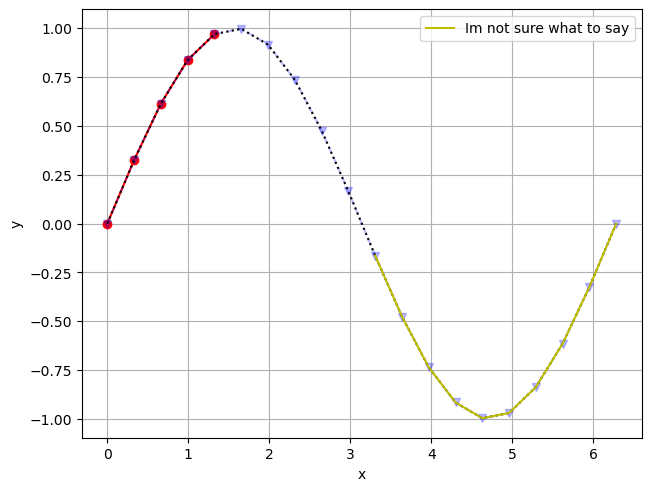

In [191]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro', label='Line1') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25, label='AnotherLine') # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k', label='Black dotted line') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y', label='I''m not sure what to say') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)
ax.legend(handles=lines[-1])

### Customizing the legend position

We can move the legend around by specifying qualitative locations where it should go (default is "best").

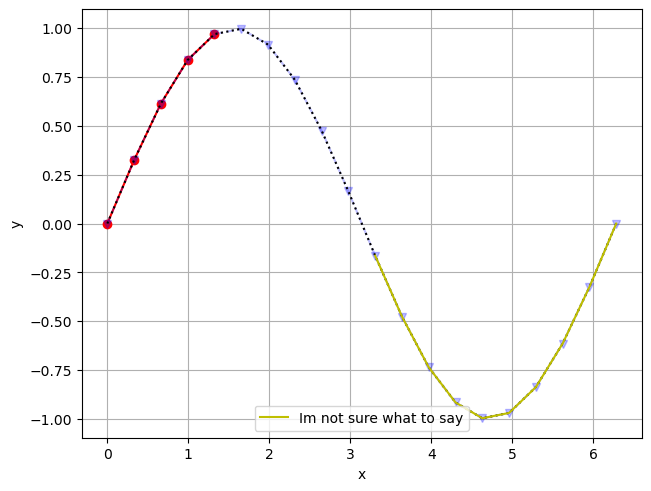

In [195]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro', label='Line1') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25, label='AnotherLine') # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k', label='Black dotted line') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y', label='I''m not sure what to say') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)
ax.legend(handles=lines[-1], loc='lower center')

We can have even more control over where the legend is positioned by altering the `bbox_to_anchor` property of the legend:
- Sets the part of the legend specified by `loc` at the location specified by the `bbox_to_anchor`
- For example, to set the upper-right-hand corner of the legend to the center of the axes:
    - Set `loc` to `'upper right'`
    - Set `bbox_to_anchor` to 0.5 0.5 (half width of axes, half height of axes, starting from bottom left-hand corner)

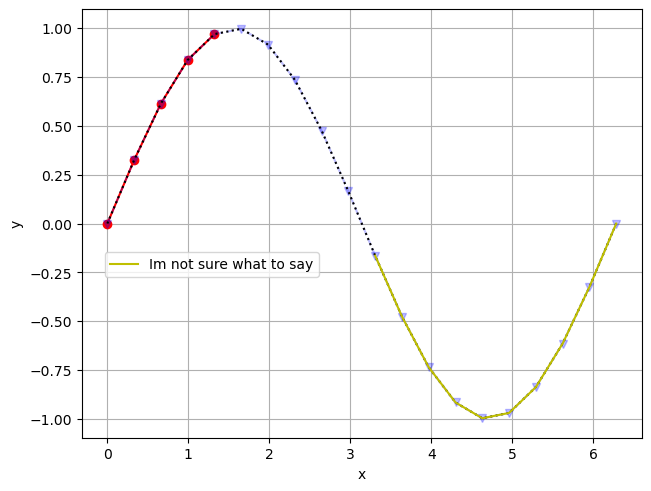

In [213]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro', label='Line1') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25, label='AnotherLine') # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k', label='Black dotted line') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y', label='I''m not sure what to say') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)

# Create legend
fig.legend(handles=lines[-1], loc='upper right', bbox_to_anchor=[0.5,0.5])

We can even use this to put the legend outside of the Axes
- Set `bbox_to_anchor` to `[1, 1.25]`. This sets the x position of the legend box's upper right hand corner to the full width of the axes, and the height to 1.25 of the Axes height (starting from the bottom lefthand corner)

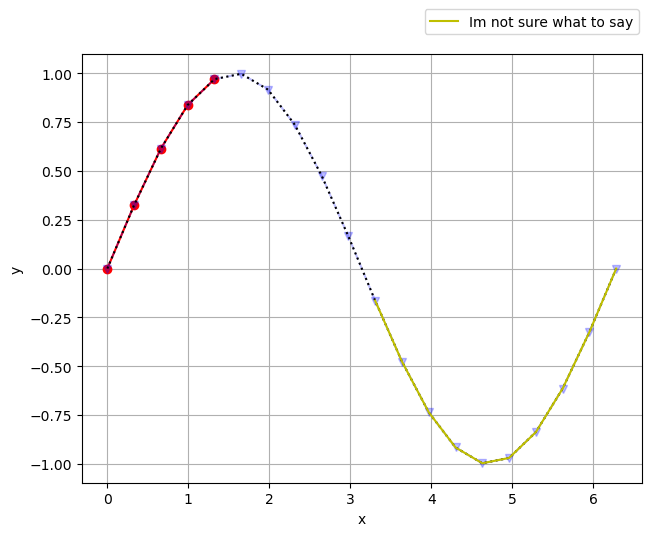

In [214]:
# Let's create a figure with a single axes
fig, ax = plt.subplots(layout='constrained', sharex=True, sharey=True)

# Preallocate our storage for lines
lines = np.zeros(4, dtype=object)

# Talk to each axes to plot on it
lines[0] = ax.plot(x[0:5], y[0:5], '-ro', label='Line1') # Red line with circular markers
lines[1] = ax.plot(x, y, '--bv', alpha=0.25, label='AnotherLine') # Dashed blue line with triangular markers, partially transparent
lines[2] = ax.plot(x, y, ':k', label='Black dotted line') # Black dotted line (no markers)
lines[3] = ax.plot(x[10:], y[10:], 'y', label='I''m not sure what to say') # Yellow line (solid line plotted by default)

ax.set(xlabel='x', ylabel='y')
ax.grid(visible=True)

# Create legend
fig.legend(handles=lines[-1], loc='upper right', bbox_to_anchor=[1,1.1])